In [44]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dblib import mssql
%matplotlib inline
sns.set()

#grey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
grey = ["#FFFFFF", "#AAAAAA"]
sns.set(font='Times New Roman', font_scale=1.4)
#sns.set_palette(grey)

In [46]:
#load data
#mv_graph_plat_cam_net.sql
sql = "select mosaic_group,issue,postal,weighted_n_across_groups_sans_brexit as score,weighted_n_in_group_sans_brexit from " \
"v_graph_mosaic_weighting where postal<>'postal' and n>200 order by issue,mosaic_group"


with mssql.Conn('labour', 's30',security='sqlserver',user='sa', pw='GGM290471') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['mosaic_group', 'issue', 'postal', 'score', 'weighted_n_in_group_sans_brexit']

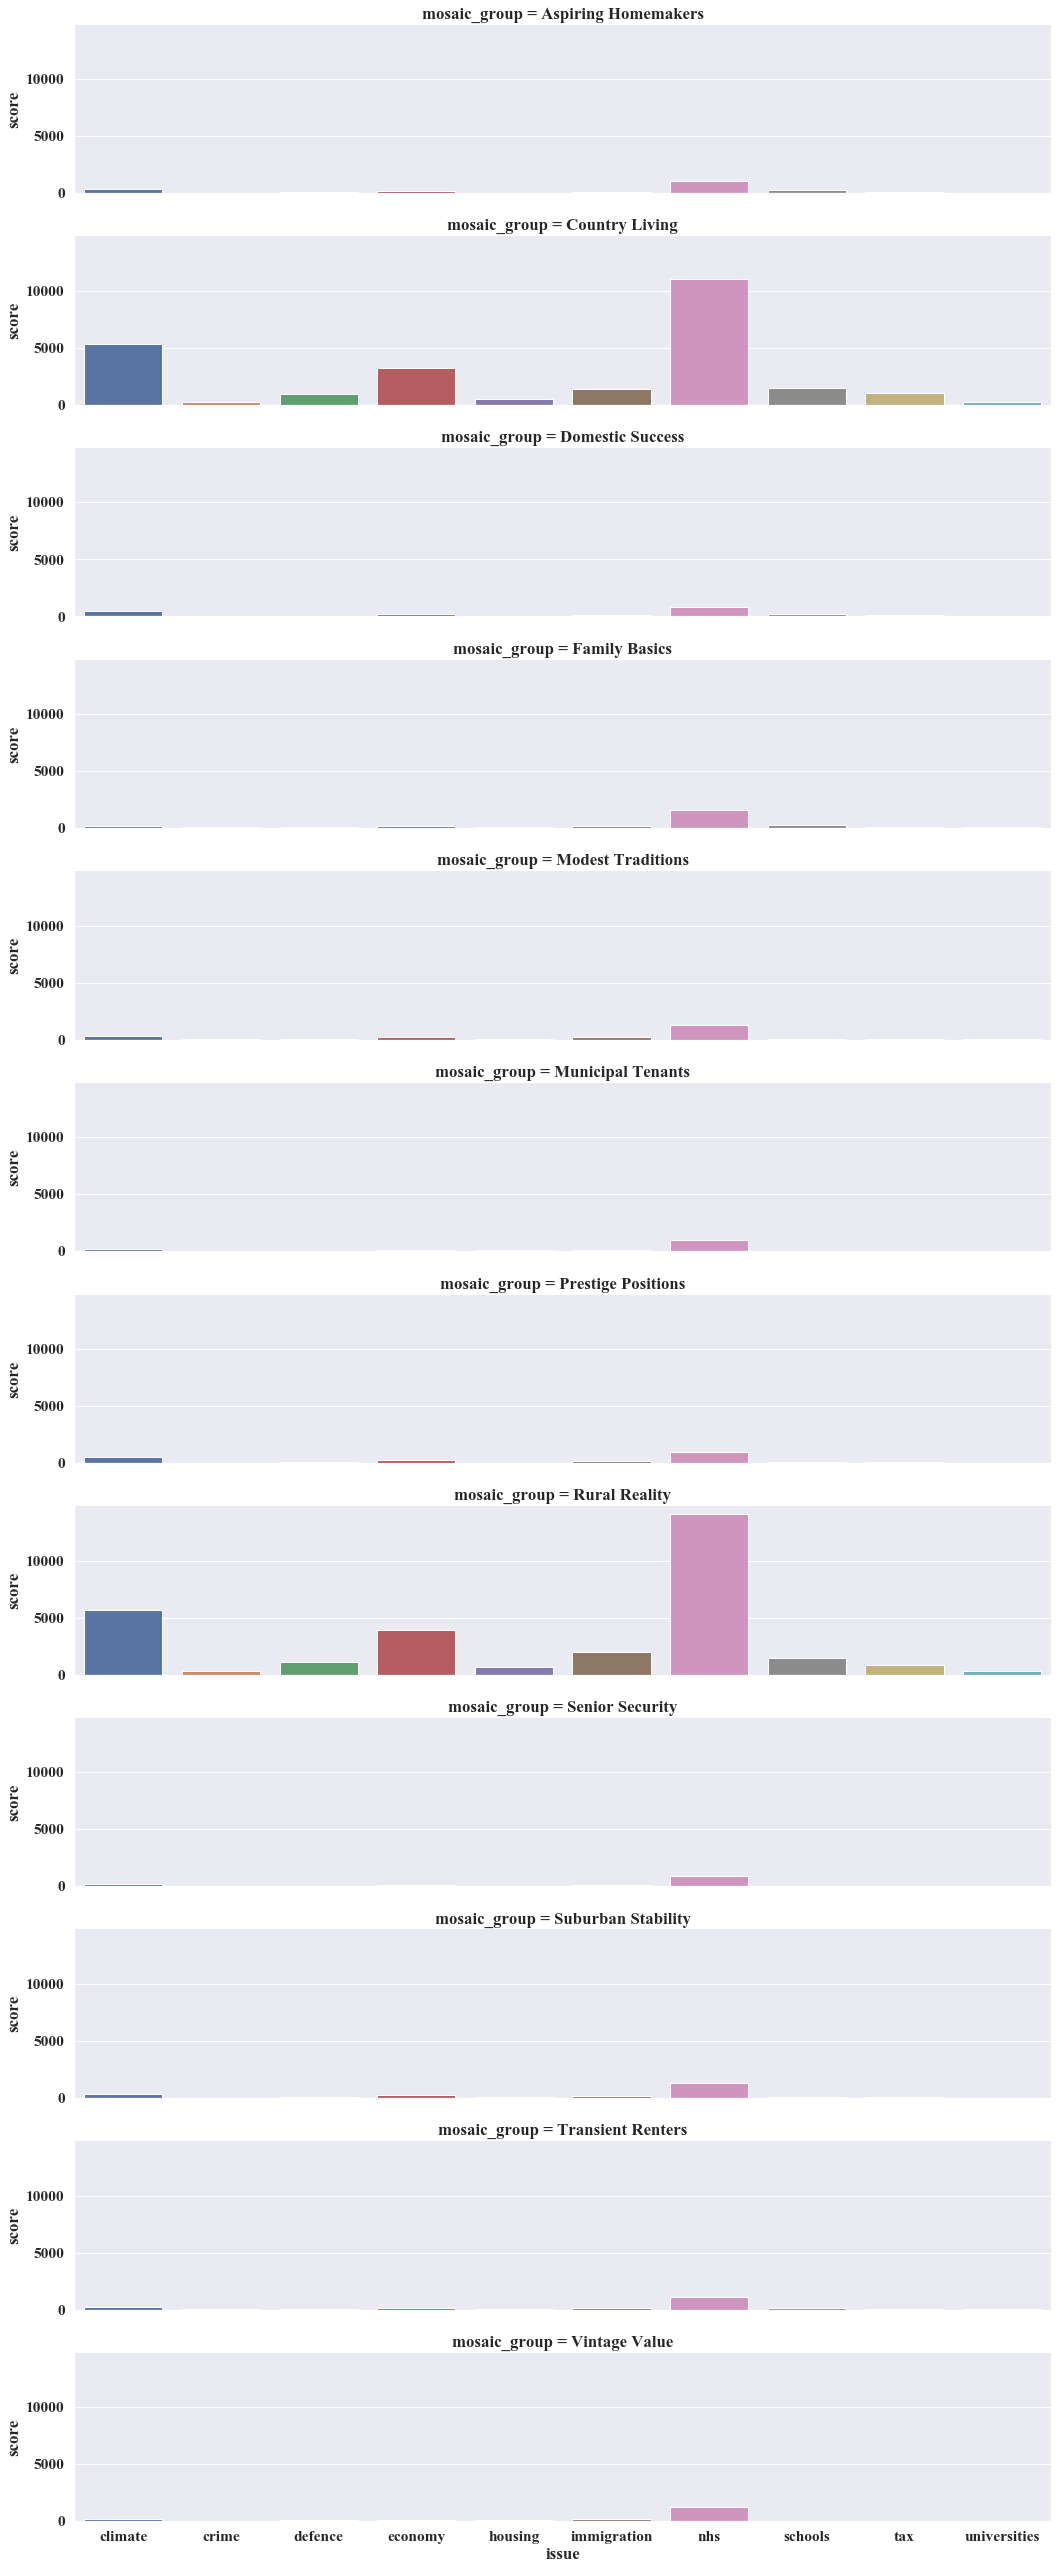

In [47]:
g = sns.catplot(x="issue", y="score", row="mosaic_group",
                data=df, height=3, aspect=5, kind="bar")
#g.fig.suptitle('Overall Title')
plt.savefig(r'C:\Users\Graham Monkman\OneDrive\Documents\Political\Labour\Senedd Campaign 2021\insight_graphs\mosaic_weight_sans_brexit.png', dpi=300)